In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from dbfread import DBF
%matplotlib inline

In [47]:
FILE_OD_TRIP_ATTR = r"T:\SLD\Danville_OD_premium_trip_4712_TravelCount\Danville_OD_premium_4712_od_trip_attributes_counts_all.csv"
FILE_OD_COUNTS_ALL = r"T:\SLD\Danville_OD_premium_trip_4712_TravelCount\Danville_OD_premium_4712_od_counts_all.csv"
FILE_OD_TRIP_PURP = r"T:\SLD\Danville_OD_premium_trip_4712_TravelCount\Danville_OD_premium_4712_od_trip_purpose_counts.csv"
FILE_ZONE_DISTRICT_DBF = r"R:\Danville\DATA\Data_Received\DanvilleMPO_TAZ_RevDist_06182018\DanvilleMPO_TAZ_RevDist_06182018.dbf"


#### District Mapper

In [48]:
df_zones = pd.DataFrame(iter(DBF(FILE_ZONE_DISTRICT_DBF)))
zone_district_mapper = df_zones.set_index('TAZ_2018').loc[:,'DistName']

In [69]:
df_zones.loc[df_zones.DistName == 'Danville Mall']

,OBJECTID_1,OBJECTID,CITY,TAZ_2018,HU_10,POP_10,HH_10,HH_POP_10,GQ_10,GQ_POP_10,...,RTEMP_2016,NRTEMP_16,TEMP_2045,RTEMP_2045,NRTEMP_45,SHAPE_LENG,DistNo,DistName,Shape_Le_1,Shape_Area
54,55,55.0,Danville,55,0,0,0,0,0,0,...,419.0,148.0,525.0,436.0,89.0,15519.10,5,Danville Mall,0.048788,0.000063
63,64,64.0,Danville,64,40,55,32,55,0,0,...,219.0,89.0,385.0,289.0,96.0,9828.99,15,Danville Mall,0.031072,0.000040
64,65,65.0,Danville,65,0,0,0,0,0,0,...,94.0,59.0,142.0,97.0,45.0,4228.83,15,Danville Mall,0.013069,0.000010
66,67,67.0,Danville,67,367,790,343,790,0,0,...,189.0,193.0,355.0,196.0,159.0,32811.14,15,Danville Mall,0.102191,0.000155
67,68,68.0,Danville,68,29,45,27,45,0,0,...,477.0,127.0,604.0,496.0,108.0,23775.14,15,Danville Mall,0.073222,0.000119
68,69,69.0,Danville,69,3,3,2,3,0,0,...,913.0,190.0,1173.0,984.0,189.0,9794.01,5,Danville Mall,0.030579,0.000046
69,70,70.0,Danville,70,0,0,0,0,0,0,...,541.0,95.0,584.0,566.0,18.0,9037.84,5,Danville Mall,0.028446,0.000036
70,71,71.0,Danville,71,26,66,24,66,0,0,...,354.0,49.0,434.0,367.0,67.0,11870.24,5,Danville Mall,0.036869,0.000054
71,72,72.0,Danville,72,28,54,22,54,0,0,...,85.0,384.0,436.0,88.0,348.0,9739.11,5,Danville Mall,0.028082,0.000036
72,73,73.0,Danville,73,186,345,179,216,1,129,...,92.0,315.0,379.0,95.0,284.0,9843.67,5,Danville Mall,0.031421,0.000021


### OD Counts

In [ ]:
df_od_counts_all = pd.read_csv(FILE_OD_COUNTS_ALL)

In [4]:
df_od_counts_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178542 entries, 0 to 178541
Data columns (total 20 columns):
Type of Travel                            178542 non-null object
Origin Zone ID                            178542 non-null int64
Origin Zone Name                          178542 non-null int64
Origin Zone Is Pass-Through               178542 non-null object
Origin Zone Direction (degrees)           0 non-null float64
Origin Zone is Bi-Direction               178542 non-null object
Destination Zone ID                       178542 non-null int64
Destination Zone Name                     178542 non-null int64
Destination Zone Is Pass-Through          178542 non-null object
Destination Zone Direction (degrees)      0 non-null float64
Destination Zone is Bi-Direction          178542 non-null object
Day Type                                  178542 non-null object
Day Part                                  178542 non-null object
O-D Traffic (Trip Counts)                 178542 non-nul

In [7]:
SELECT_COLS_OD_COUNTS = [
    'Origin Zone ID','Destination Zone ID','Day Type','Day Part',
    'O-D Traffic (Trip Counts)',
 'O-D Traffic (StL Index)',
 'Origin Zone Traffic (Trip Counts)',
 'Origin Zone Traffic (StL Index)',
 'Destination Zone Traffic (Trip Counts)',
 'Destination Zone Traffic (StL Index)',
 'Avg Trip Duration (sec)']

In [9]:
selection = (df_od_counts_all['Day Type'] == '1: Average Weekday (M-F)') & (df_od_counts_all['Day Part'] == '0: All Day (12am-12am)') 

In [10]:
df_od_counts_all = df_od_counts_all.loc[selection,SELECT_COLS_OD_COUNTS]

In [11]:
df_od_counts_all.describe()

,Origin Zone ID,Destination Zone ID,O-D Traffic (Trip Counts),O-D Traffic (StL Index),Origin Zone Traffic (Trip Counts),Origin Zone Traffic (StL Index),Destination Zone Traffic (Trip Counts),Destination Zone Traffic (StL Index),Avg Trip Duration (sec)
count,17934.000000,17934.000000,17934.000000,17934.000000,17934.000000,17934.000000,17934.000000,17934.000000,17841.000000
mean,78.132820,78.039701,13.869689,9.889093,2010.380395,1425.953942,2035.809914,1443.776458,1567.097248
std,45.447908,45.237004,28.967121,20.358465,1833.747745,1279.091537,1921.165770,1339.499077,757.537078
min,1.000000,1.000000,1.000000,0.000000,21.000000,10.000000,13.000000,6.000000,183.000000
25%,42.000000,42.000000,2.000000,1.000000,699.000000,502.000000,707.000000,494.000000,1089.000000
50%,75.000000,75.000000,5.000000,3.000000,1545.000000,1121.000000,1538.000000,1118.000000,1438.000000
75%,114.000000,114.000000,14.000000,10.000000,2386.000000,1762.000000,2549.000000,1755.000000,1863.000000
max,166.000000,166.000000,747.000000,522.000000,9227.000000,6323.000000,9727.000000,6686.000000,14397.000000


### Trip Purpose Counts

In [28]:
df_trip_purp = pd.read_csv(FILE_OD_TRIP_PURP)

In [29]:
df_trip_purp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178542 entries, 0 to 178541
Data columns (total 18 columns):
Type of Travel                          178542 non-null object
Origin Zone ID                          178542 non-null int64
Origin Zone Name                        178542 non-null int64
Origin Zone Is Pass-Through             178542 non-null object
Origin Zone Direction (degrees)         0 non-null float64
Origin Zone is Bi-Direction             178542 non-null object
Destination Zone ID                     178542 non-null int64
Destination Zone Name                   178542 non-null int64
Destination Zone Is Pass-Through        178542 non-null object
Destination Zone Direction (degrees)    0 non-null float64
Destination Zone is Bi-Direction        178542 non-null object
Day Type                                178542 non-null object
Day Part                                178542 non-null object
O-D Traffic (Trip Counts)               178542 non-null int64
O-D Traffic (StL Ind

In [30]:
SELECT_COLS_TRIP_PURP = [
    'Origin Zone ID','Destination Zone ID','Day Type','Day Part',
    'O-D Traffic (Trip Counts)',
 'O-D Traffic (StL Index)',
 'Purpose HBW (percent)',
 'Purpose HBO (percent)',
 'Purpose NHB (percent)']

In [31]:
df_trip_purp = df_trip_purp.loc[:,SELECT_COLS_TRIP_PURP]

In [33]:
df_trip_purp['HBW_Trip_StL'] = df_trip_purp['O-D Traffic (StL Index)'] * df_trip_purp['Purpose HBW (percent)']
df_trip_purp['HBO_Trip_StL'] = df_trip_purp['O-D Traffic (StL Index)'] * df_trip_purp['Purpose HBO (percent)']
df_trip_purp['NHB_Trip_StL'] = df_trip_purp['O-D Traffic (StL Index)'] * df_trip_purp['Purpose NHB (percent)']

#### Diurnal Distribution of the HBW, HBO, and NHB Trips

In [34]:
df_trip_purp['Day Type'].unique()

array(['0: Average Day (M-Su)', '1: Average Weekday (M-F)',
       '2: Average Weekend Day (Sa-Su)'], dtype=object)

In [35]:
df_trip_purp = df_trip_purp.loc[df_trip_purp['Day Type'] == '1: Average Weekday (M-F)']

In [36]:
df_trip_purp_gb = df_trip_purp.groupby('Day Part')['HBW_Trip_StL','HBO_Trip_StL','NHB_Trip_StL'].agg(sum)
df_trip_purp_gb

,HBW_Trip_StL,HBO_Trip_StL,NHB_Trip_StL
Day Part,,,
0: All Day (12am-12am),23675.118,66632.603,87042.936
1: Early AM (12am-6am),1329.367,2214.431,1679.225
2: Peak AM (6am-10am),6822.228,10749.377,10927.382
3: Mid-Day (10am-3pm),6698.681,19123.693,37189.789
4: Peak PM (3pm-7pm),5706.124,22011.432,27321.392
5: Late PM (7pm-12am),3189.247,13109.325,10318.402


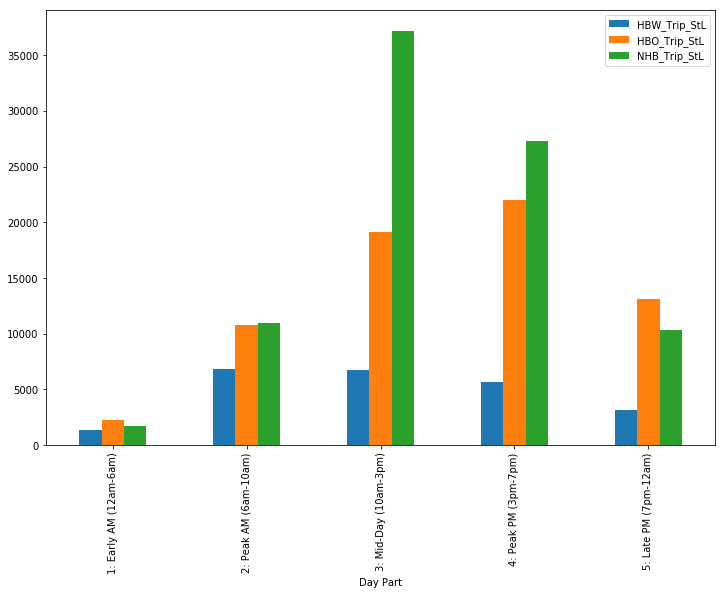

In [42]:
fig, ax = plt.subplots(figsize=(12,8))
df_trip_purp_gb.loc[df_trip_purp_gb.index != '0: All Day (12am-12am)'].plot(kind='bar', ax=ax)

In [63]:
# Consider only Peak period trips
df_trip_purp_peak = df_trip_purp.loc[(df_trip_purp['Day Part'].str.contains('Peak AM')) | (df_trip_purp['Day Part'].str.contains('Peak PM')), df_trip_purp.columns]

In [64]:
df_trip_purp_peak.loc[:,'O_District'] = df_trip_purp_peak['Origin Zone ID'].map(zone_district_mapper)
df_trip_purp_peak.loc[:,'D_District'] = df_trip_purp_peak['Destination Zone ID'].map(zone_district_mapper)

In [65]:
df_trip_purp_peak_gb = df_trip_purp_peak.groupby(['O_District', 'D_District'])['HBW_Trip_StL'].sum().reset_index()
df_trip_purp_peak_gb.sort_values(by=['O_District','D_District']).loc[:,['O_District','D_District','HBW_Trip_StL']].pivot(index='O_District', columns='D_District', values='HBW_Trip_StL').to_csv('HBW_Trips_STL_Peak.csv')

In [22]:
selection = (df_trip_purp['Day Type'] == '1: Average Weekday (M-F)') & (df_trip_purp['Day Part'] == '0: All Day (12am-12am)') 

In [24]:
df_trip_purp.describe()

,Origin Zone ID,Destination Zone ID,O-D Traffic (Trip Counts),O-D Traffic (StL Index),Purpose HBW (percent),Purpose HBO (percent),Purpose NHB (percent)
count,17934.000000,17934.000000,17934.000000,17934.000000,16978.000000,16978.000000,16978.000000
mean,78.132820,78.039701,13.869689,9.889093,0.092667,0.423785,0.483548
std,45.447908,45.237004,28.967121,20.358465,0.211234,0.346096,0.359543
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,42.000000,2.000000,1.000000,0.000000,0.075000,0.160000
50%,75.000000,75.000000,5.000000,3.000000,0.000000,0.398000,0.460000
75%,114.000000,114.000000,14.000000,10.000000,0.057000,0.686000,0.813000
max,166.000000,166.000000,747.000000,522.000000,1.000000,1.000000,1.000000


In [25]:
df_trip_purp[df_trip_purp.duplicated(subset=['Origin Zone ID', 'Destination Zone ID'])]

,Origin Zone ID,Destination Zone ID,Day Type,Day Part,O-D Traffic (Trip Counts),O-D Traffic (StL Index),Purpose HBW (percent),Purpose HBO (percent),Purpose NHB (percent)


### Trip Attribute

In [26]:
df_trip_attr = pd.read_csv(FILE_OD_TRIP_ATTR)

In [27]:
df_trip_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178542 entries, 0 to 178541
Data columns (total 68 columns):
Type of Travel                          178542 non-null object
Origin Zone ID                          178542 non-null int64
Origin Zone Name                        178542 non-null int64
Origin Zone Is Pass-Through             178542 non-null object
Origin Zone Direction (degrees)         0 non-null float64
Origin Zone is Bi-Direction             178542 non-null object
Destination Zone ID                     178542 non-null int64
Destination Zone Name                   178542 non-null int64
Destination Zone Is Pass-Through        178542 non-null object
Destination Zone Direction (degrees)    0 non-null float64
Destination Zone is Bi-Direction        178542 non-null object
Day Type                                178542 non-null object
Day Part                                178542 non-null object
O-D Traffic (Trip Counts)               178542 non-null int64
O-D Traffic (StL Ind